## Pré-Dash Strava
### Testes e organização dos dados para dashboad

In [2]:
from running_functions import *
import matplotlib.pylab as plt
import time
import streamlit as st
import plotly.graph_objects as go
import plotly.express as px
from running_functions import gpxfile_imp
from datetime import datetime, timedelta
import locale
locale.setlocale(locale.LC_TIME, "pt_BR.utf8")
#carregar_basededados
df = pd.read_parquet("data_base.parquet")  # Carregar
print('base de dados:')
print('Periodo:',df['date'][0],'-',df['date'].iloc[-1])
print('total de atividades:',df['date'].nunique()) 

#indice da primeira ocorrencia
first_ocorr = df.drop_duplicates(subset='date', keep='first')
ind_first_ocorr = first_ocorr.index #indice_das_atividades


base de dados:
Periodo: 06/03/2025-06:29 - 26/07/2023-05:44
total de atividades: 438


In [3]:
atv_week,list_atv=data_week(df)
#print('Total semanas:',len(atv_week))

atv_week.iloc[[1]]
#pd.set_option('display.max_row', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [ ]:
#plotar Volume
# Vol,Date_Vol=vol_week(df,atv_week,16)
# plt.bar(Date_Vol,Vol)
# plt.xticks(rotation=45,fontsize=8)
# plt.show()

In [25]:
# plt.figure(figsize=(14, 5))
# i=2
# data_e = [lista_atv[i]]
# df0 = df[df['date'].isin(data_e)]
# #plt.scatter(df0['distance'], df0['pace'])
# plt.title(df0['date'].iloc[0][0:10])
# plt.ylim([3,7])

# #filtragens
# df_m=df0[df0['moving']==True] #apenas em movimento
# df_p=df_m[(df_m['pace']<=7) &(df_m['pace']>=3) ]

# #plt.scatter(df_m['distance'], df_m['pace'])
# plt.scatter(df_p['distance'], df_p['pace'])
# plt.draw()  # Atualiz o grafico 
#     #o gráfico
# plt.pause(0.1)  # Pausa para garantir que o gráfico seja exibido
#     #plt.waitforbuttonpress()
#     #plt.ginput(1)

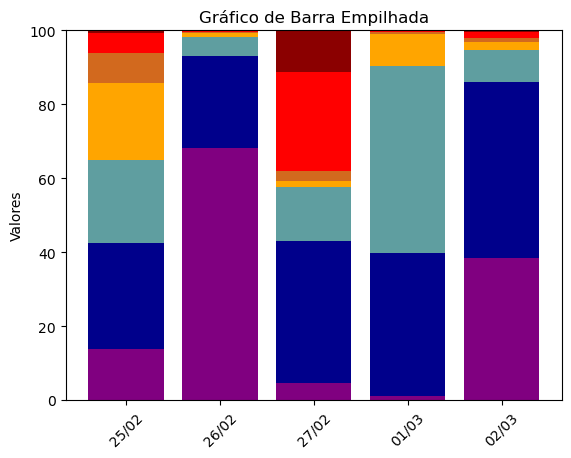

In [27]:
#calcular volume por zona
ftpa='4:10'
z=pace_zones(ftpa) #calculo_zonas
#leitura da semana
#atv_week.iloc[[1]]

datas_da_semana = atv_week['datas_da_semana'][1]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']  # Paleta de cores fixa
colors = ['#800080', '#00008b', '#5f9ea0','#ffa500','#d2691e','#ff0000','#8b0000']
for data in datas_da_semana:
    df0 = df[df['date'] == data]
    
    # Filtragem dos dados
    df_m = df0[df0['moving']]
    df_p = df_m[(df_m['pace'] <= 7) & (df_m['pace'] >= 3)]
    
    t, d, p = df_p['time'], df_p['distance'], df_p['pace']
    zn = find_zones(p, t, d, z)
    
    valores = np.array(zn['p_zones'][2:9]) * 100
    zonas = ['z1', 'z2', 'z3', 'z4', 'z5a', 'z5b', 'z5c']
    
    bottom = 0
    for i, (zona, valor) in enumerate(zip(zonas, valores)):
        plt.bar(data[0:5], valor, bottom=bottom, label=zona, color=colors[i])
        bottom += valor

plt.ylabel('Valores')
plt.title('Gráfico de Barra Empilhada')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor visualização
# plt.legend(loc='upper right')  # Adiciona a legenda, se necessário

plt.show()
